### step 1 : data collection

In [2]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def download_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
download_housing_data()

In [12]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housingdf = load_housing_data()

In [13]:
# show sample of data
housingdf.sample(15)
# check data description 
# https://www.kaggle.com/camnugent/california-housing-prices

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16627,-120.84,35.33,15.0,3276.0,670.0,1520.0,613.0,3.6412,207800.0,NEAR OCEAN
9359,-122.52,37.95,33.0,4448.0,631.0,1675.0,628.0,7.8904,468800.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
11133,-117.93,33.85,36.0,2147.0,416.0,1011.0,392.0,3.2188,196900.0,<1H OCEAN
8453,-118.35,33.91,25.0,1884.0,554.0,1337.0,549.0,2.8512,272800.0,<1H OCEAN
19593,-120.87,37.60,32.0,4579.0,914.0,2742.0,856.0,2.6619,86200.0,INLAND
15978,-122.46,37.76,52.0,1817.0,449.0,948.0,380.0,3.9300,390000.0,NEAR BAY
2240,-119.81,36.83,19.0,6789.0,1200.0,2325.0,1109.0,4.0490,126000.0,INLAND
4943,-118.28,34.02,46.0,1098.0,426.0,1510.0,374.0,2.1382,156300.0,<1H OCEAN
5429,-118.42,34.02,22.0,3292.0,1134.0,1655.0,898.0,3.1746,348800.0,<1H OCEAN


In [5]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Step 2 : Eploratory Data Analysis

In [6]:
housingdf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# check for nans or missing values
housingdf.isna().sum() # notice that there are some nans , we may drop them

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
housingdf.dropna(inplace=True)

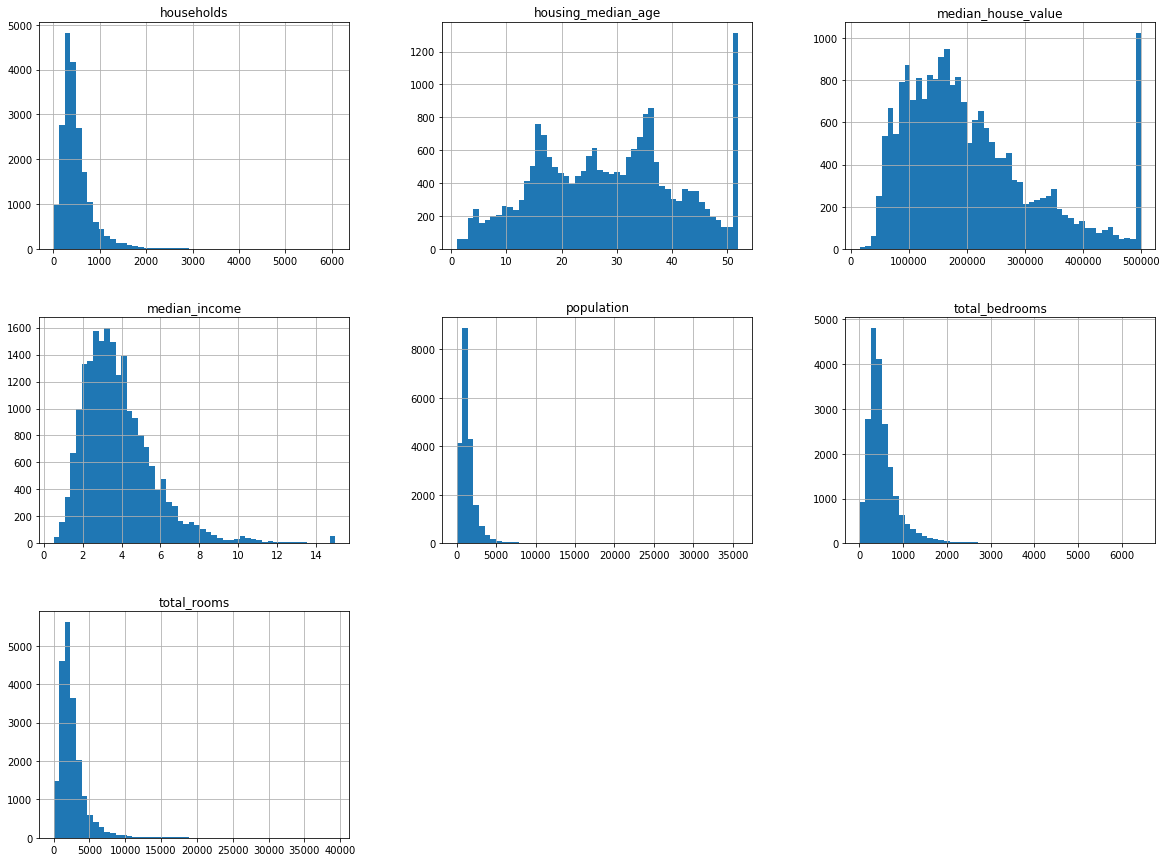

In [25]:
# plot feature distributions
import matplotlib.pyplot as plt
explore_df=housingdf.drop(columns=['ocean_proximity','longitude','latitude'],axis=1)
explore_df.hist(bins=50, figsize=(20,15))
plt.show()

`Notes
1-These attributes have very different scales
2-many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions and also we should scale features`

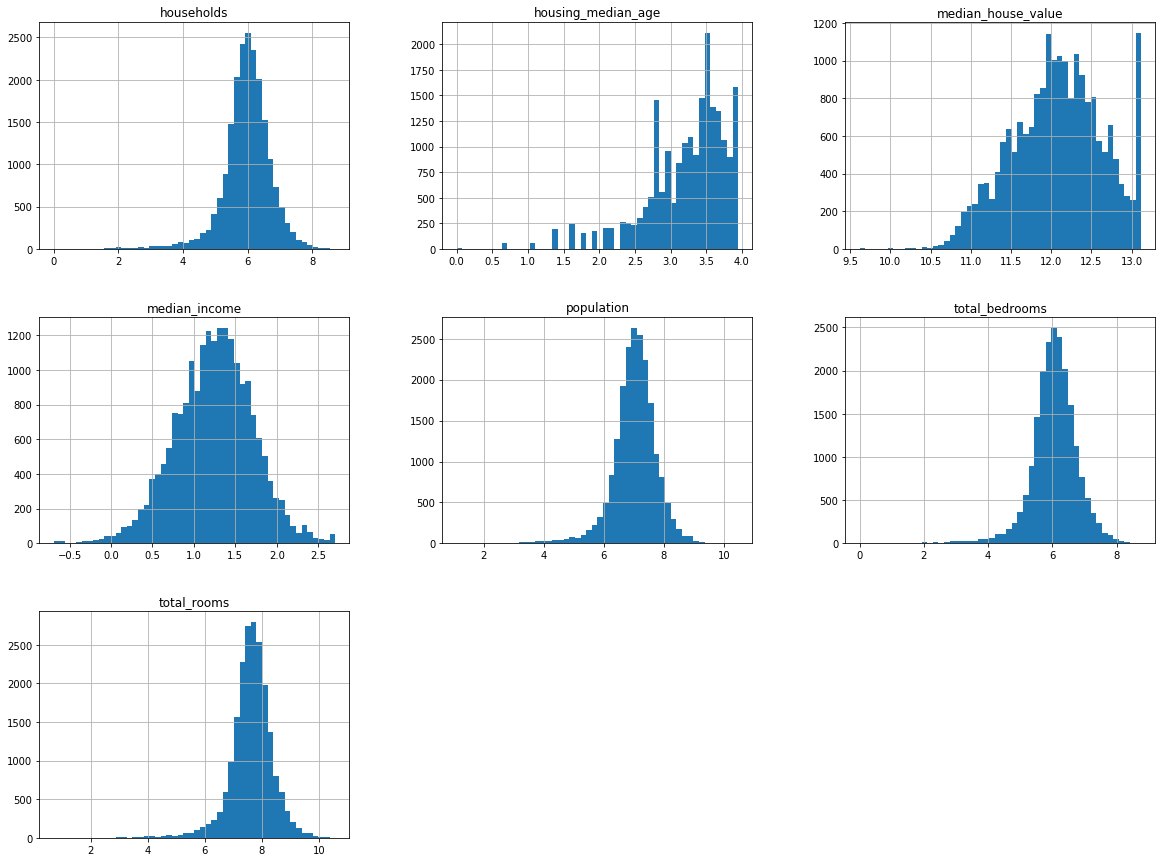

In [26]:
# take log() feature helps solve skewness problem
import numpy as np
explore_df=np.log(explore_df)
explore_df.dropna(inplace=True)
explore_df.hist(bins=50, figsize=(20,15))
plt.show()

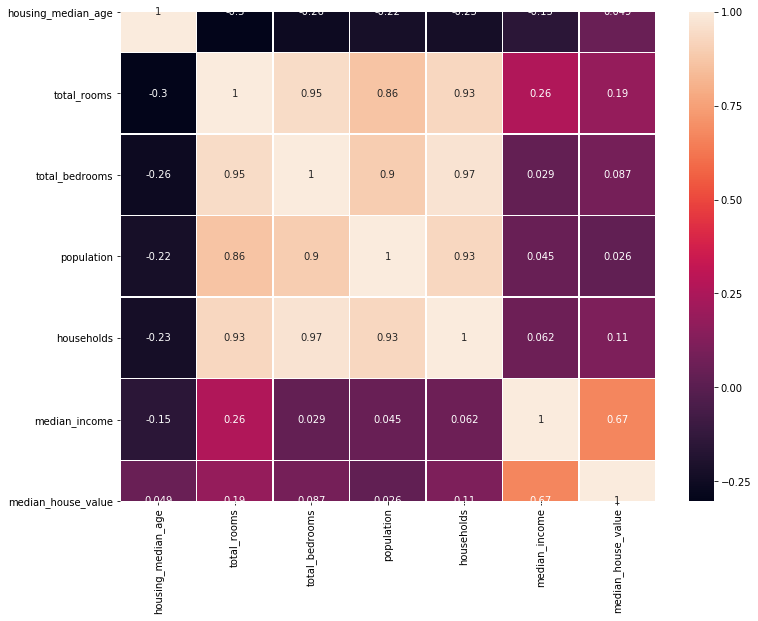

In [13]:
# plot feature corelations
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,9)) 
sns.heatmap(explore_df.corr(),annot=True,ax=ax,linewidths=0.5)

In [0]:
# more correlation plots
from pandas.plotting import scatter_matrix
scatter_matrix(explore_df, figsize=(15, 15))
plt.show()

In [27]:
final_df=pd.concat([explore_df,pd.get_dummies(housingdf['ocean_proximity'])],axis=1)
final_df.sample(15)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10397,1.386294,8.098339,6.590301,7.204149,6.448889,1.544643,12.124863,1,0,0,0,0
10531,1.386294,8.098339,6.624065,7.158514,6.478510,1.397482,12.328290,1,0,0,0,0
20419,3.295837,7.734996,5.768321,6.874198,5.771441,1.874291,12.763973,1,0,0,0,0
20443,3.912023,5.231109,3.496508,4.867534,3.555348,1.207108,13.122365,1,0,0,0,0
16253,3.951244,6.368187,4.736198,5.736572,4.532599,0.940983,10.900436,0,1,0,0,0
19259,2.833213,8.027477,6.376727,7.440734,6.380123,1.369377,12.048834,1,0,0,0,0
6380,3.951244,7.541683,5.993961,6.638568,5.921578,1.395873,12.490123,0,1,0,0,0
8451,3.332205,7.653495,6.280396,7.303170,6.284134,1.405484,12.394211,1,0,0,0,0
53,3.951244,7.396335,6.122493,7.057898,5.991465,0.221142,11.554067,0,0,0,1,0
15520,2.833213,8.827175,7.397562,8.417594,7.295735,0.961341,11.815250,1,0,0,0,0


### step 3 Model training and evaluation

In [58]:
# feature scaling and model training
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
min_max_scaler = preprocessing.MinMaxScaler()
X = final_df.loc[:,final_df.columns!='median_house_value'] # features
Y = final_df['median_house_value'] # label
X = min_max_scaler.fit_transform(X)
linear_reg = LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
linear_reg.fit(xtrain,ytrain)
preds=linear_reg.predict(xtest)
print('model rmse = ',np.mean((preds-ytest)**2))

model rmse =  0.11238910227629388


In [59]:
# test model with cross validation
# visualize rmse scores
import plotly.graph_objects as go
scores = cross_val_score(linear_reg, X , Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = -scores
fig = go.Figure(
    data=[go.Bar(x=[i for i in range(4)],y=list(rmse_scores)[:4])],
    layout_title_text="cv versus model error"
)
fig.show()